In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta


In [7]:
# 自訂 function 可重新 reload
from importlib import reload
from utils import util_inference_result
reload(util_inference_result)
from utils.util_inference_result import *

In [8]:
# def read_multiple_imputations(folder_path, missing_k):
#     """
#     goal: read multiple imputations that are generated from 'inference_multiples.py', shape (obs, channel, length)
#     output: return an array, shape (number of imputation files, obs, channel, missing_k)
#     input:
#         folder_path = the folder that contains the file we want to read
#         missing_k = same 'missing_k' in config file, i.e, the number of the last elements to be predicted, ex: 24 in my case
#     """
#     # Check if the folder exists
#     if not os.path.exists(folder_path):
#         print(f"Folder '{folder_path}' does not exist.")
#         return

#     # Get a list of files in the folder
#     file_list = os.listdir(folder_path)

#     # Filter out only imputation0.npy files
#     npy_files = [file for file in file_list if file.endswith("imputation0.npy")]

#     if not npy_files:
#         print(f"No imputation0.npy files found in '{folder_path}'.")
#         return

#     # Loop through the all imputation0.npy files and read them
#     stack_array_data = None
#     for npy_file in npy_files:
#         array_data = read_missing_k_data(folder_path, npy_file, missing_k)
#         array_data = array_data.reshape(tuple([1]) + array_data.shape) # array_data.shape = (obs, channel, length) -> (1, obs, channel, length)

#         if stack_array_data is None:
#             stack_array_data = array_data
#         else:
#             stack_array_data = np.vstack((stack_array_data, array_data))

#     # print(f"return (1) Load and stack all imputation0.npy files, shape: {stack_array_data.shape} = (files, obs, channels, length)")

#     return stack_array_data



# def read_missing_k_data(folder_path, npy_file, missing_k):
#     """
#     goal: return the last 24 elements of each observation
#     output: an array, shape (obs, channel, length = missing_k)
#     input:
#         folder_path = the folder that contains the file we want to read
#         npy_file = the file name that we want to read, ex: "original0.npy"
#         missing_k = same'missing_k' in config file, i.e, the number of the last elements to be predicted, ex: 24 in my case
#     """
#     file_path = os.path.join(folder_path, npy_file)
#     true = np.load(file_path)
#     true = true[:,:,(-missing_k):]
#     # print(f"return test data with imputation, shape{true.shape}")
#     return true  
# def pred_interval(pred, beta):
#     """
#     goal: compute the (1-alpha) quantile of imputation ecdf, i.e, prediction interval
#     output: lower bound and upper bound, shape: (obs, channel, length)
#     input:
#         pred = all data, shape(number of imputation files, obs, channel, length)
#         beta = significance level of original prediction interval
#     """
#     beta = 0.05
#     # compute original prediciton intervals
#     L = np.quantile(pred_data, 0.025, axis=0)
#     U = np.quantile(pred_data, 0.975, axis=0)

#     return L, U

# def compute_E_star(L, U, true, alpha):
#     """
#     goal: compute the (1-alpha) quantile of conformity scores, i.e, E_star
#     output: E_star, shape: (channel, length)
#     input:
#         L = lower bound to be adjusted, shape: (obs, channel, length)
#         U = upper bound to be adjusted, shape: (obs, channel, length)        
#         alpha = miscoverage rate of conformal prediction
#     """

#     alpha = 0.05

#     # compute the conformity scores
#     E = np.maximum(L-true, true-U)
    
#     # compute the (1-alpha) quantile of conformity scores
#     CP_PAR = (1+1/true.shape[0])*(1-alpha)
#     E_star = np.quantile(E, CP_PAR, axis=0)

#     return E_star

# def adjust_PI(L, U, E_star):
#     """
#     goal: adjust prediction interval using conformal prediction
#     output: adjusted lower and upper bound, shape: (obs, channel, length)
#     input: 
#         L = lower bound to be adjusted, shape: (obs, channel, length)
#         U = upper bound to be adjusted, shape: (obs, channel, length)
#         E_star = scores, shape: (channel, length)
#     """
#     E_star_exd = np.expand_dims(E_star, axis=0)
#     return L-E_star_exd, U+E_star_exd

# def coverage_rate(L, U, true):
#     """
#     goal: compute the coverage rate, which is the proportion of [L,U] contains true data 
#     output: an array, shape (shape, length)
#     input:
#         L = lower bound, shape: (2209, 1, 24)
#         U = upper bound, shape: (2209, 1, 24)
#         true = true data, shape: (2209, 1, 24)
#     """
#     return np.sum(np.logical_and(true_data > L, true_data < U), axis=0)/true.shape[0]

# def generate_date_from_seq(value):
#     """
#     goal: what is the date of given number of obs
#     output: date
#     input: a value (obs)
#     """
#     start_date = datetime.strptime("2019-01-08", "%Y-%m-%d")
#     days_offset = value
#     target_date = start_date + timedelta(days=days_offset)
#     formatted_date = target_date.strftime("%Y/%m/%d")
    
#     return formatted_date


# I_2

In [4]:
folder_path = "/home/hchuang/Documents/Project/SSSD_CP/src/results/NYISO_NYC_split/T200_beta00.0001_betaT0.02/imputaiton_multiple/"
pred_data = read_multiple_imputations(folder_path, 24)
true_data = read_missing_k_data(folder_path, npy_file="original0.npy", missing_k = 24)

print(f"pred_data, shape: {pred_data.shape}")
print(f"true_data, shape: {true_data.shape}")

pred_data, shape: (100, 2209, 1, 24)
true_data, shape: (2209, 1, 24)


In [5]:
L, U = pred_interval(pred_data, beta = 0.05)
E_star = compute_E_star(L, U, true_data, alpha = 0.05)
L_star, U_star = adjust_PI(L, U, E_star)

In [6]:
coverage_rate(L, U, true_data)

array([[0.11407877, 0.13218651, 0.14803078, 0.14350385, 0.14395654,
        0.13897691, 0.12992304, 0.12494341, 0.11090991, 0.09868719,
        0.09280217, 0.08963332, 0.08012675, 0.08782254, 0.08510638,
        0.07876867, 0.0769579 , 0.08963332, 0.09189679, 0.09416025,
        0.09008601, 0.08918062, 0.08465369, 0.09234948]])

In [7]:
coverage_rate(L_star, U_star, true_data)

array([[0.95020371, 0.95020371, 0.95020371, 0.95020371, 0.95020371,
        0.95020371, 0.95020371, 0.95020371, 0.95020371, 0.95020371,
        0.95020371, 0.95020371, 0.95020371, 0.95020371, 0.95020371,
        0.95020371, 0.95020371, 0.95020371, 0.95020371, 0.95020371,
        0.95020371, 0.95020371, 0.95020371, 0.95020371]])

# Test data

In [8]:
folder_path = '/home/hchuang/Documents/Project/SSSD_CP/src/datasets/NYISO/8_days/zone/'
file_path = os.path.join(folder_path, 'load_array_N.Y.C._test.npy')
test_data_o = np.load(file_path)
print(test_data_o.shape)
test_data_o = np.swapaxes(test_data_o, axis1=1, axis2=2)
print(test_data_o.shape)

(358, 192, 1)
(358, 1, 192)


## adjusted pred interval

In [9]:
folder_path = "/home/hchuang/Documents/Project/SSSD_CP/src/results/NYISO_NYC_split_test/T200_beta00.0001_betaT0.02/imputaiton_multiple/"
pred_data = read_multiple_imputations(folder_path, 24)
true_data = read_missing_k_data(folder_path, npy_file="original0.npy", missing_k = 24)

print(f"pred_data, shape: {pred_data.shape}")
print(f"true_data, shape: {true_data.shape}")

pred_data, shape: (100, 358, 1, 24)
true_data, shape: (358, 1, 24)


In [10]:
all_true_data = read_missing_k_data(folder_path, npy_file="original0.npy", missing_k = 192)
print(f"all_true_data, shape: {all_true_data.shape}")

all_true_data, shape: (358, 1, 192)


In [12]:
L, U = pred_interval(pred_data, beta = 0.05)
L_star, U_star = adjust_PI(L, U, E_star)

## coverage rate

In [13]:
cr = coverage_rate(L, U, true_data)
cr_star = coverage_rate(L_star, U_star, true_data)

In [14]:
print(cr)
print(np.mean(cr))

[[0.10893855 0.1424581  0.12290503 0.11731844 0.12011173 0.12011173
  0.10614525 0.12290503 0.11731844 0.10335196 0.05865922 0.08379888
  0.08100559 0.08100559 0.08379888 0.08938547 0.08379888 0.07541899
  0.06703911 0.04189944 0.06424581 0.0698324  0.09497207 0.08100559]]
0.09322625698324023


In [15]:
print(cr_star)
print(np.mean(cr_star))

[[0.94413408 0.92458101 0.91061453 0.90782123 0.91340782 0.91340782
  0.9301676  0.93854749 0.93575419 0.93296089 0.9301676  0.94413408
  0.93575419 0.92178771 0.91620112 0.91620112 0.92178771 0.90782123
  0.91340782 0.90782123 0.91340782 0.9273743  0.92458101 0.91899441]]
0.922951582867784


In [16]:
base_time = datetime.strptime("00:00", "%H:%M")
# Create a list of 24 elements by adding 1 hour to the base time in each iteration
hours_sequence = [base_time + timedelta(hours=i) for i in range(24)]
# Format the elements as strings in the desired format (HH:MM)
formatted_sequence = [time.strftime("%H:%M") for time in hours_sequence]


## vis

2019/04/18


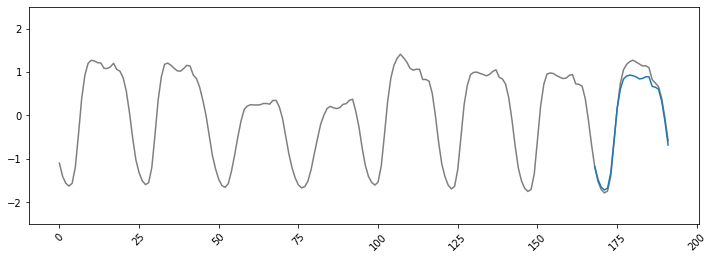

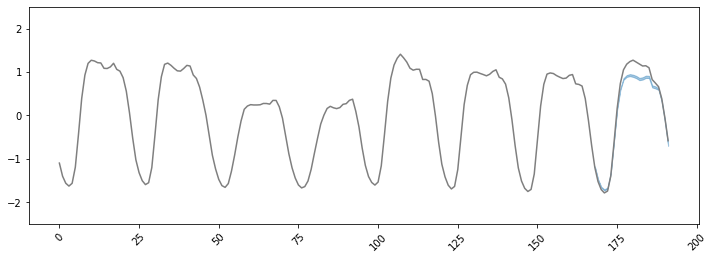

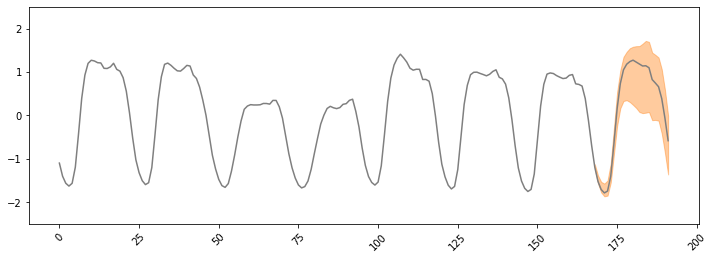

In [17]:
obs = 100
date = generate_date_from_seq(obs)
print(date)
# x = formatted_sequence
x = range(0,192)
y = all_true_data[obs,0,:]
x_predict = range(168, 192)
y_pred_mean = pred_data_mean[obs,0,:]


plt.figure(figsize=(12, 4)) 
plt.plot(x, y, color = 'tab:gray')
plt.plot(x_predict, y_pred_mean, color = 'tab:blue')
# plt.title("mean prediction: " + date)
plt.xticks(rotation=45) 
plt.ylim(-2.5, 2.5) 
plt.show()


lower = L[obs,0,:]
upper = U[obs,0,:]

plt.figure(figsize=(12, 4)) 
plt.plot(x, y, color = 'tab:gray')
# plt.title("original prediction interval: " + date)
plt.xticks(rotation=45) 
plt.fill_between(x_predict, lower, upper, color='tab:blue', alpha=0.4)
plt.ylim(-2.5, 2.5) 
plt.show()

lower = L_star[obs,0,:]
upper = U_star[obs,0,:]

plt.figure(figsize=(12, 4)) 
plt.plot(x, y, color = 'tab:gray')
# plt.title("adjusted prediction interval: " + date)
plt.xticks(rotation=45) 
plt.fill_between(x_predict, lower, upper, color='tab:orange', alpha=0.4)
plt.ylim(-2.5, 2.5) 
plt.show()

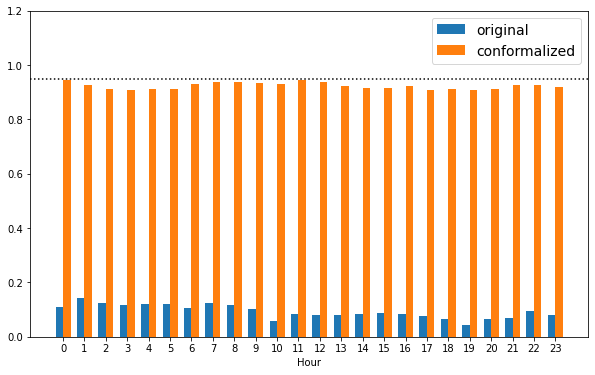

In [24]:
a = cr
b = cr_star

# Generate x values (assuming 24 hours)
x = np.arange(24)

# Set the width of the bars
bar_width = 0.35


# Plotting
plt.figure(figsize=(10,6))
plt.bar(x - bar_width/2, a.flatten(), bar_width, label='original')
plt.bar(x + bar_width/2, b.flatten(), bar_width, label='conformalized')

# Customize the plot

plt.xlabel('Hour')
plt.ylabel('')
# plt.title('Coverage Rate')
plt.xticks(x)
plt.legend(fontsize="14")
plt.ylim(0, 1.2) 
plt.axhline(y = 0.95, color = 'black', linestyle = ':') 

# Show the plot
plt.show()
